## Aprendizaje supervisado: API básica

El flujo básico para entrenar un modelo se resume en la siguiente imágen:

<img src=../../img/supervised-ml-workflow.png width=600>

Todos los estimadores de scikit-learn para realizar aprendizaje supervisado comparten la misma API, por lo que cuentan como **mínimo**:

   * `fit(X_train, y_train)`: ajusta el modelo con los datos de entrenamiento
   * `predict(X_test)`: obtiene las predicciones del modelo, una vez ajustado
   * `score(X_test, y_test)`: evalúa el modelo usando la métrica por defecto
   
Esto hace que cambiar el modelo que estamos ajustando sea muy sencillo. Vamos a ver un ejemplo. Primero obtenemos los datos de transfusiones de sangre y dividimos en entrenamiento y test:

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

blood = fetch_openml('blood-transfusion-service-center')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(blood.data, blood.target)

Ajustamos un modelo de $k$ vecinos próximos para intentar clasificar si una persona ha donado sangre o no en marzo de 2007:

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("tasa de acierto: ", knn.score(X_test, y_test))
y_pred = knn.predict(X_test)
knn.score(X_train, y_train)

tasa de acierto:  0.732620320855615


0.928698752228164

In [9]:
import pandas as pd
pd.DataFrame({'pred': y_pred, 'real': y_test})

,pred,real
0,2,1
1,2,1
2,2,2
3,1,1
4,2,1
...,...,...
182,1,1
183,1,1
184,1,2
185,1,1


In [12]:
pd.DataFrame({'pred': knn.predict(X_train), 'real': y_train})

,pred,real
0,2,2
1,1,1
2,2,2
3,1,1
4,1,1
...,...,...
556,1,1
557,1,1
558,2,2
559,1,1


### Ejercicio

Para distintos valores de $k$

  1. Calcular la tasa de acierto del conjunto de entrenamiento
  
  2. Dado el resultado del punto anterior, que crees que está sucediendo?

## Efecto de hiper-parámetros

In [4]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
breast = load_breast_cancer(as_frame=True)
data = breast.data
data['target'] = breast.target

In [9]:
data.corr()['target'].abs().sort_values(ascending=False)

target                     1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data[['worst concave points', 'concavity error']], data['target'],
                                                    random_state=42)

Ajustamos otro modelo, pero ahora solo dos variables (las que tiene más correlación):

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from itertools import product

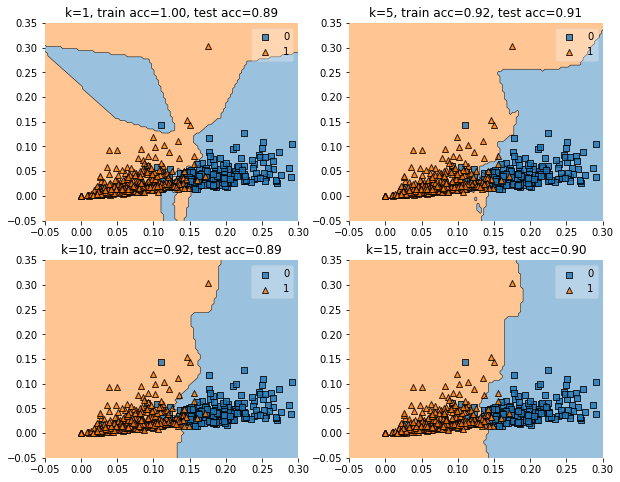

In [19]:
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10,8))

for k, idx in zip((1, 5, 10, 15), product([0, 1], [0, 1])):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    
    ax = plt.subplot(gs[idx[0], idx[1]])
    fig = plot_decision_regions(data[['worst concave points', 'concavity error']].values, data['target'].values, 
                                clf=knn)
    plt.title(f"k={k}, train acc={train_score:.2f}, test acc={test_score:.2f}")
    plt.xlim((-0.05, 0.3))
    plt.ylim((-0.05, 0.35))

### Ejercicio

1. Carga el conjunto de datos iris y ajusta un clasificador KNN a los datos

2. Prueba con distintos valores del parámetro `k`

3. Ajusta ahora una clasificador `RandomForestClassifier` y calcula el error en el conjunto de entrenamiento y test. ¿Cuál tiene mejor rendimiento?